In [1]:
!pip install nltk scikit-learn pandas matplotlib seaborn



In [5]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [6]:
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
from google.colab import files
uploaded = files.upload()

Saving sentiment_analysis_dataset_50k.csv to sentiment_analysis_dataset_50k.csv


In [12]:
from google.colab import files
uploaded = files.upload()



Saving sentiment_analysis_dataset_50k (1).csv to sentiment_analysis_dataset_50k (1).csv


In [13]:
import pandas as pd
df = pd.read_csv("sentiment_analysis_dataset_50k.csv")
df.head()


,label,text
0,negative,@chrishasboobs AHHH I HOPE YOUR OK!!!
1,negative,"@misstoriblack cool , i have no tweet apps fo..."
2,negative,@TiannaChaos i know just family drama. its la...
3,negative,School email won't open and I have geography ...
4,negative,upper airways problem


In [14]:
ps = PorterStemmer()

def clean_text(text):
    text = re.sub('[^a-zA-Z]', ' ', text)  # remove special chars
    text = text.lower().split()            # lowercase and split
    text = [ps.stem(word) for word in text if word not in stop_words]
    return ' '.join(text)

df['cleaned_text'] = df['text'].apply(clean_text)
df[['text', 'cleaned_text']].head()


,text,cleaned_text
0,@chrishasboobs AHHH I HOPE YOUR OK!!!,chrishasboob ahhh hope ok
1,"@misstoriblack cool , i have no tweet apps fo...",misstoriblack cool tweet app razr
2,@TiannaChaos i know just family drama. its la...,tiannachao know famili drama lame hey next tim...
3,School email won't open and I have geography ...,school email open geographi stuff revis stupid...
4,upper airways problem,upper airway problem


In [15]:
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['cleaned_text']).toarray()
y = df['label']


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

Accuracy: 0.7508

Classification Report:
               precision    recall  f1-score   support

    negative       0.76      0.73      0.75      4977
    positive       0.74      0.77      0.76      5023

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



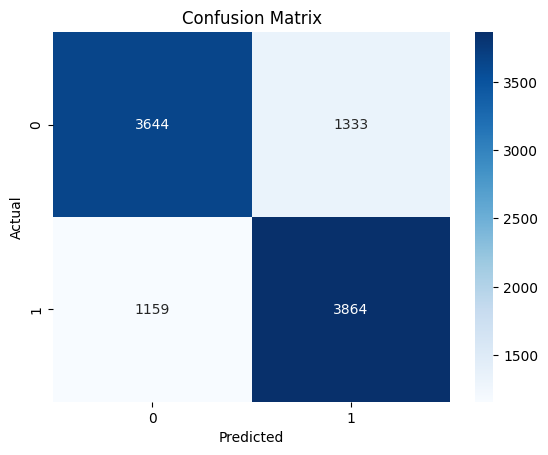

In [18]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [19]:
def predict_sentiment(tweet):
    cleaned = clean_text(tweet)
    vector = tfidf.transform([cleaned]).toarray()
    prediction = model.predict(vector)[0]
    return prediction

# Example
predict_sentiment("I love Twitter! It's amazing!")


'positive'